In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('add.csv')

In [5]:
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

In [6]:
df.shape

(255687, 21)

29


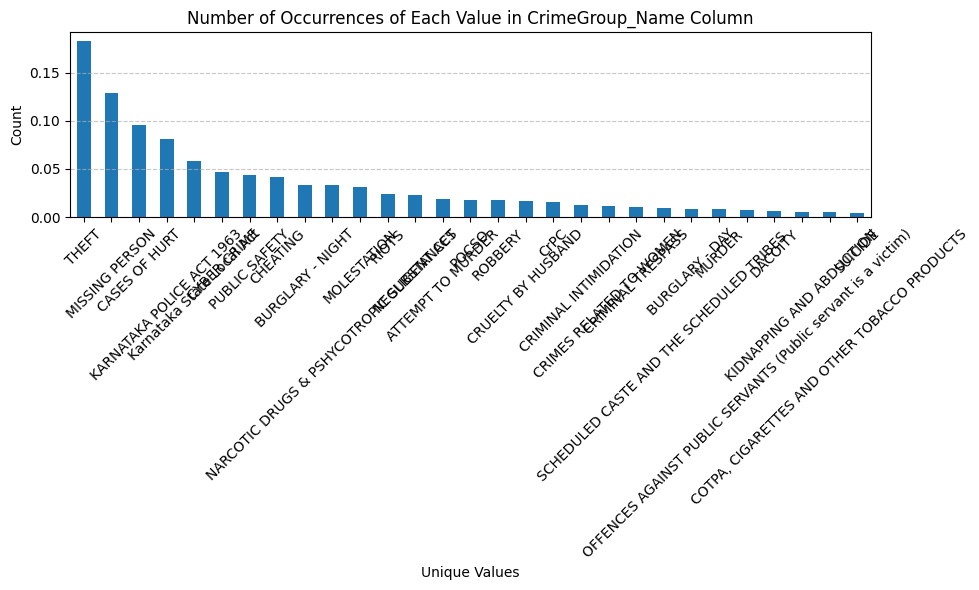

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

column_name = 'CrimeGroup_Name'
unique_values_count = df[column_name].nunique()
print(unique_values_count)

value_counts = df[column_name].value_counts(normalize=True)
cumulative_sum = value_counts.cumsum()
filtered_values = cumulative_sum[cumulative_sum <= 0.95]
selected_values = filtered_values.index.tolist()

# Filter the original DataFrame to include only rows with selected crime group names
df = df[df[column_name].isin(selected_values)]

# Plot the value counts
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title(f'Number of Occurrences of Each Value in {column_name} Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
df.shape

(229422, 21)

In [21]:
selected_columns = ['CrimeGroup_Name', 'Latitude', 'Longitude', 'FIR_Date']
df = df[selected_columns]

# Displaying the new DataFrame
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,06-01-2019
475,Karnataka State Local Act,16.141122,75.910169,14-01-2019
476,RIOTS,16.109622,75.931844,20-01-2019
477,RIOTS,16.109778,75.931920,20-01-2019
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,03-02-2019
...,...,...,...,...
775136,ATTEMPT TO MURDER,17.484623,77.628086,19-11-2023
775137,CRIMINAL INTIMIDATION,17.487559,77.628566,26-12-2023
775138,ATTEMPT TO MURDER,17.516223,76.511136,28-12-2023
775139,ATTEMPT TO MURDER,17.556849,76.124689,29-12-2023


In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(229422, 4)

In [26]:
df['FIR_Date'] = pd.to_datetime(df['FIR_Date'], format='%d-%m-%Y')

In [27]:
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,2019-01-06
475,Karnataka State Local Act,16.141122,75.910169,2019-01-14
476,RIOTS,16.109622,75.931844,2019-01-20
477,RIOTS,16.109778,75.931920,2019-01-20
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,2019-02-03
...,...,...,...,...
775136,ATTEMPT TO MURDER,17.484623,77.628086,2023-11-19
775137,CRIMINAL INTIMIDATION,17.487559,77.628566,2023-12-26
775138,ATTEMPT TO MURDER,17.516223,76.511136,2023-12-28
775139,ATTEMPT TO MURDER,17.556849,76.124689,2023-12-29


In [29]:
df['year'] = df['FIR_Date'].dt.year
df['month'] = df['FIR_Date'].dt.month
df['day'] = df['FIR_Date'].dt.day
df['hour'] = df['FIR_Date'].dt.hour
df['weekday'] = df['FIR_Date'].dt.weekday

In [30]:
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date,year,month,day,hour,weekday
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,2019-01-06,2019,1,6,0,6
475,Karnataka State Local Act,16.141122,75.910169,2019-01-14,2019,1,14,0,0
476,RIOTS,16.109622,75.931844,2019-01-20,2019,1,20,0,6
477,RIOTS,16.109778,75.931920,2019-01-20,2019,1,20,0,6
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,2019-02-03,2019,2,3,0,6
...,...,...,...,...,...,...,...,...,...
775136,ATTEMPT TO MURDER,17.484623,77.628086,2023-11-19,2023,11,19,0,6
775137,CRIMINAL INTIMIDATION,17.487559,77.628566,2023-12-26,2023,12,26,0,1
775138,ATTEMPT TO MURDER,17.516223,76.511136,2023-12-28,2023,12,28,0,3
775139,ATTEMPT TO MURDER,17.556849,76.124689,2023-12-29,2023,12,29,0,4


In [31]:
df.drop(columns=['hour'], inplace=True)

In [32]:
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date,year,month,day,weekday
474,KARNATAKA POLICE ACT 1963,16.054967,75.950667,2019-01-06,2019,1,6,6
475,Karnataka State Local Act,16.141122,75.910169,2019-01-14,2019,1,14,0
476,RIOTS,16.109622,75.931844,2019-01-20,2019,1,20,6
477,RIOTS,16.109778,75.931920,2019-01-20,2019,1,20,6
478,KARNATAKA POLICE ACT 1963,16.083599,75.904582,2019-02-03,2019,2,3,6
...,...,...,...,...,...,...,...,...
775136,ATTEMPT TO MURDER,17.484623,77.628086,2023-11-19,2023,11,19,6
775137,CRIMINAL INTIMIDATION,17.487559,77.628566,2023-12-26,2023,12,26,1
775138,ATTEMPT TO MURDER,17.516223,76.511136,2023-12-28,2023,12,28,3
775139,ATTEMPT TO MURDER,17.556849,76.124689,2023-12-29,2023,12,29,4


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [38]:
df = df.head(100)

In [39]:
df.shape

(100, 8)

In [84]:
features = ['year', 'month', 'day', 'Latitude', 'Longitude']
X = df[features]
y = df['CrimeGroup_Name']

In [85]:

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example prediction
example_data = pd.DataFrame({'year': [2024],
                             'month': [7],
                             'day': [14],
                             'Latitude': [40.7128],
                             'Longitude': [-74.0060]})
prediction = rf_classifier.predict(example_data)
print("Predicted crime:", prediction[0])

Accuracy: 0.35
Predicted crime: 10


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import folium
from folium.plugins import HeatMap

In [54]:
le = LabelEncoder()
df.loc[:, 'CrimeGroup_Name'] = le.fit_transform(df['CrimeGroup_Name'])


In [55]:
df

,CrimeGroup_Name,Latitude,Longitude,FIR_Date,year,month,day,weekday
474,7,16.054967,75.950667,2019-01-06,2019,1,6,6
475,8,16.141122,75.910169,2019-01-14,2019,1,14,0
476,11,16.109622,75.931844,2019-01-20,2019,1,20,6
477,11,16.109778,75.931920,2019-01-20,2019,1,20,6
478,7,16.083599,75.904582,2019-02-03,2019,2,3,6
...,...,...,...,...,...,...,...,...
585,7,15.983060,75.902977,2020-05-05,2020,5,5,1
586,12,16.021319,75.881233,2020-05-12,2020,5,12,1
587,0,16.019699,75.879609,2020-05-15,2020,5,15,4
588,0,16.019711,75.879642,2020-05-15,2020,5,15,4


In [82]:
X = df.drop(['CrimeGroup_Name', 'FIR_Date'], axis=1)
y = df['CrimeGroup_Name']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Random Forest model
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Predictions
y_pred = rfc.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.67      0.60      0.63        10
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         2
          10       0.17      1.00      0.29         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1

    accuracy                           0.40        20
   macro avg       0.20      0.23      0.18        20
weighted avg       0.44      0.40      0.40        20


Confusion Matrix:
 [[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 6 0 1 2 1 0]
 [0 0 0 0 1 0 0 0 1]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0]]


C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [63]:

# Predict crime locations for a specific date/time
# This can be done by creating a grid of latitude and longitude coordinates and predicting the crime type for each point
# Then, visualize the predicted crimes on a heatmap

# Create a grid of latitude and longitude coordinates
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()



In [64]:
# Generate grid points
grid_points = []
for lat in np.linspace(min_lat, max_lat, num=10):
    for lon in np.linspace(min_lon, max_lon, num=10):
        grid_points.append([lat, lon])


In [68]:
# Predict crime types for grid points
predicted_crimes = rfc.predict(X)  # Predict using the original features X

# Create heatmap
heat_data = [[point[0], point[1]] for idx, point in enumerate(grid_points) if predicted_crimes[idx] == 1]
crime_heatmap = folium.Map(location=[np.mean(df['Latitude']), np.mean(df['Longitude'])], zoom_start=12)
HeatMap(heat_data).add_to(crime_heatmap)

# Display heatmap
crime_heatmap.save('crime_heatmap.html')
crime_heatmap


In [81]:
from sklearn.ensemble import GradientBoostingClassifier
X = df.drop(['CrimeGroup_Name', 'FIR_Date'], axis=1)
y = df['CrimeGroup_Name']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(X_train, y_train)

# Predictions
y_pred = gbc.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.3

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.44      0.40      0.42        10
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         2
          10       0.20      1.00      0.33         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1

    accuracy                           0.30        20
   macro avg       0.21      0.24      0.18        20
weighted avg       0.33      0.30      0.29        20


Confusion Matrix:
 [[0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [1 0 4 0 2 2 0 1]
 [0 0 0 1 0 0 0 1]
 [0 0 2 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]]


C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [78]:
from sklearn.svm import SVC
X = df.drop(['CrimeGroup_Name', 'FIR_Date'], axis=1)
y = df['CrimeGroup_Name']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Support Vector Machine model
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
# Predictions
y_pred = svm.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Predict crime locations for a specific date/time

Accuracy: 0.25

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           7       0.42      0.50      0.45        10
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.04      0.05      0.05        20
weighted avg       0.21      0.25      0.23        20


Confusion Matrix:
 [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 5 0 4 1 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 

C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 